<Axes: xlabel='date'>

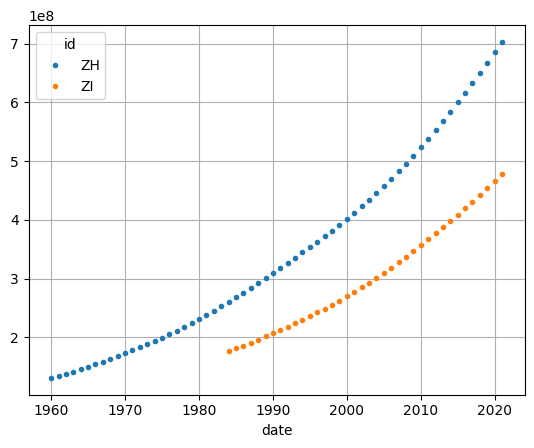

In [95]:
import requests
import pandas as pd

d = requests.get('http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=100', timeout = 0.5).json()

df = pd.DataFrame(d[1])

#df = pd.concat([df, df["indicator"].apply(pd.Series)], axis = 1).copy(deep = True)
df = df.rename(columns = {"value": "population"})
df = pd.concat([df, df["country"].apply(pd.Series)], axis = 1).copy(deep = True)

df = pd.pivot_table(df, values = "population", index = "date", columns = "id")

df.plot(style = ".", grid = True)

